# TRABAJO PRÁCTICO Nº 1

**Alumnos:**
- Nahuel Arrieta
- Lucas moyano

## Ejercicion N° 1: Modos de color en imagenes

### 1. Utilizando openCV en python, cargar una imagen RGB y mostrarla en una ventana utilizando el comando imread() y imshow(), tambien puede utilizar matplotlib para mostrarla.


In [30]:
import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [31]:
def read_image(image_name):
  image_path = "./images/" + image_name

  # Read the image
  image = cv2.imread(image_path)
  if image is None:
    sys.exit("Could not read the image " + image_path)
  return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [32]:
def show_image(label, image):
  ## Create a plot
  plt.imshow(image, cmap='gray')
  plt.title(label)
  plt.axis('off')
  plt.show()


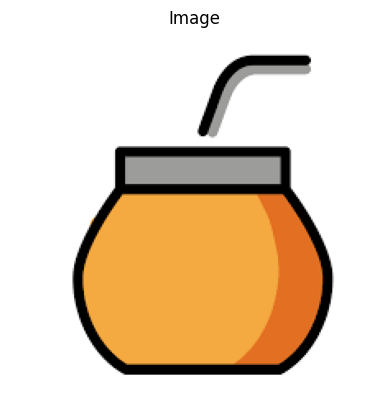

In [33]:
image_name = "mate.png"


image = read_image( image_name)
show_image("Image", image)

### 2. Una vez cargada la imagen de muestra podemos empezar usando numpy y su función array para obtener el arreglo de valores de intensidad para cada uno de los canales de color.


In [34]:
red_channel = image[:, :, 0]    # Red channel
green_channel = image[:, :, 1]  # Green channel
blue_channel = image[:, :, 2]   # Blue channel

# Display the intensities of each channel (as numpy arrays)
print("Blue Channel:")
print(blue_channel)

print("Green Channel:")
print(green_channel)

print("Red Channel:")
print(red_channel)

Blue Channel:
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
Green Channel:
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
Red Channel:
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


### 3. Retomando con el ejercicio 1, analizar la imagen cargada ¿Existe algún problema con los colores mostrados con respecto a la imagen original?

Sí, los valores de los colores rojo y azul parecen estar intercambiados. Esto ocurre porque opencv interpreta las imágenes en BGR en lugar de RGB.


### 4. Cargar la imagen pero antes de mostrarla utilizar el comando cvtColor(). ¿Que sucede ahora?


Blue Channel:
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
Green Channel:
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
Red Channel:
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


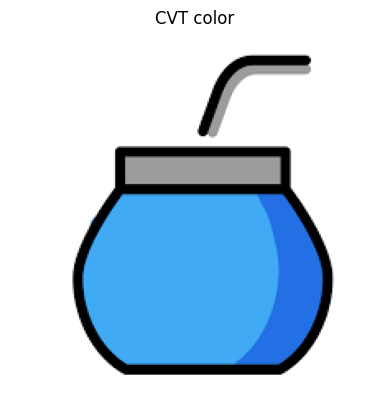

In [35]:
# Convert the image from BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

red_channel = image[:, :, 0]    # Red channel
green_channel = image[:, :, 1]  # Green channel
blue_channel = image[:, :, 2]   # Blue channel

# Display the intensities of each channel (as numpy arrays)
print("Blue Channel:")
print(blue_channel)

print("Green Channel:")
print(green_channel)

print("Red Channel:")
print(red_channel)

show_image("CVT color", image)

Los valores impresos por pantalla ahora se muestran correctamente porque cambiamos el formato de BGR a RGB. Sin embargo, cuando mostramos la imagen opencv espera que los colores estén en BGR y se ven los colores rojo y azul invertidos.

### 5. Utilizar la función split() para una imagen RGB y separar en canales


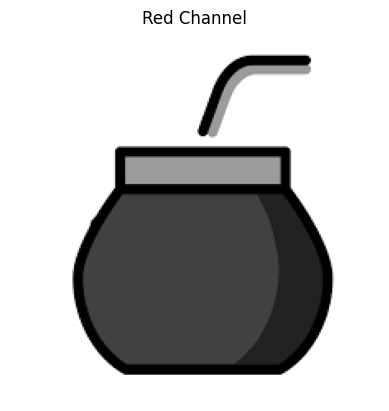

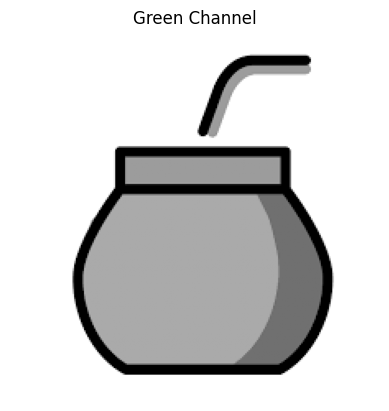

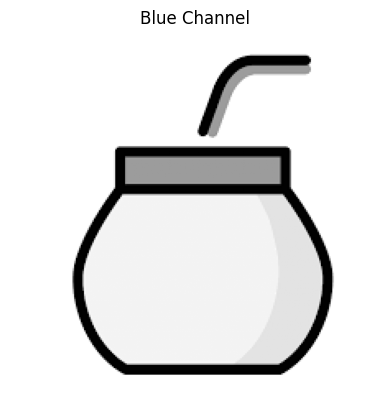

In [36]:
# Get the color channels
red_channel, green_channel, blue_channel = cv2.split(image)

# Show the individual channels
show_image('Red Channel', red_channel)
show_image('Green Channel', green_channel)
show_image('Blue Channel', blue_channel)

### 6. (*) La conversión de una imagen de color a escala de grises se puede hacer de varias formas. El ejercicio consiste en convertir la imagen de Lenna color a escala de grises utilizando diferentes metodos.


In [37]:
image = read_image( "Lenna.png")

#### a. Usando la libreria cv2 y el metodo cvtColor()


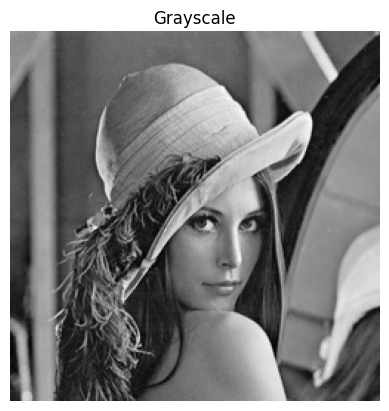

In [38]:
# Parse to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
show_image("Grayscale", gray_image)

#### b. Usando la fórmula de luminancia


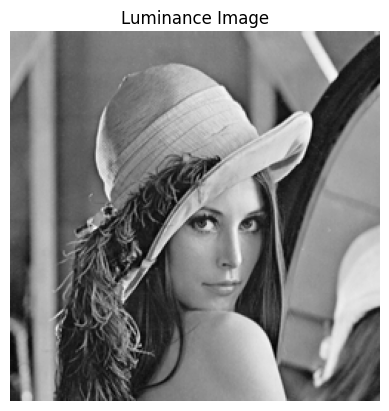

In [39]:
red_channel, green_channel, blue_channel = cv2.split(image)

# Calculate the luminance using the formula
# Y = 0.299 * R + 0.587 * G + 0.114 * B
luminance = 0.299 * red_channel + 0.587 * green_channel + 0.114 * blue_channel

# Convert the luminance to uint8
luminance = np.clip(luminance, 0, 255).astype(np.uint8)

# Show the luminance image
show_image('Luminance Image', luminance)

#### c. Usando scickit-image y el método rgb2gray


In [40]:
from skimage import io
from skimage.color import rgb2gray

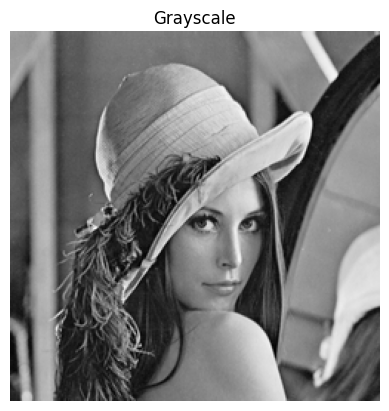

In [41]:
# Convert the image from RGB to grayscale
image_gray = rgb2gray(image)
show_image("Grayscale", image_gray)

#### d. ¿Qué pasa con los canales?


Ahora las imágenes solo tienen un único canal que corresponde, a la intensidad del blanco.

#### e.  ¿Qué profundidad de bits tiene la imagen?


In [42]:
def get_bit_depth(image):
  # Get bit depth
  dtype = image.dtype
  bit_depth = 0

  if dtype == np.uint8:
    bit_depth = 8
  elif dtype == np.uint16:
    bit_depth = 16
  elif dtype == np.float32:
    bit_depth = 32

  return bit_depth


In [43]:
# Print bit depth
print("Bit depth of the image:", get_bit_depth(image))

Bit depth of the image: 8


#### f. Evaluar con otra imagen de mayor profundidad


Bit depth of the image: 8


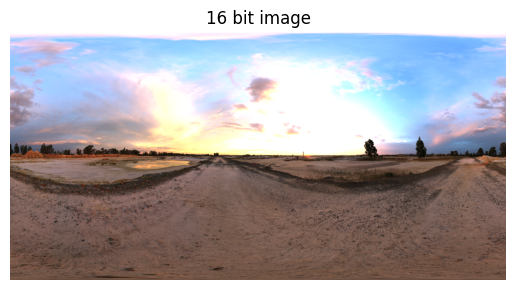

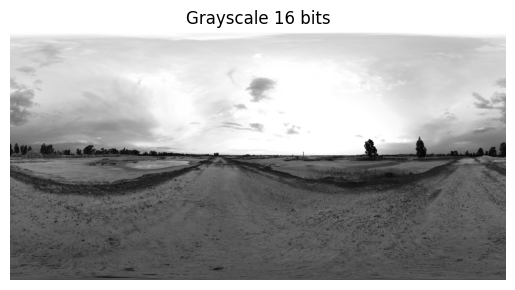

In [44]:
image_16_bits = read_image( "16_bits.png")

print("Bit depth of the image:", get_bit_depth(image_16_bits))

show_image("16 bit image", image_16_bits)

grayscale_16_bits = cv2.cvtColor(image_16_bits, cv2.COLOR_BGR2GRAY)

show_image("Grayscale 16 bits", grayscale_16_bits)

#### g. ¿Qué sucede con la imagen? ¿Ha cambiado algo?

Al ojo humano, parece no haber diferencia entre una profundidad de bits de 8 y una de 16.

### 7.  (*) Convertir la imagen de Lenna a otros modos de color, como CMYK, HSV, HSL. Mostrar el resultado.


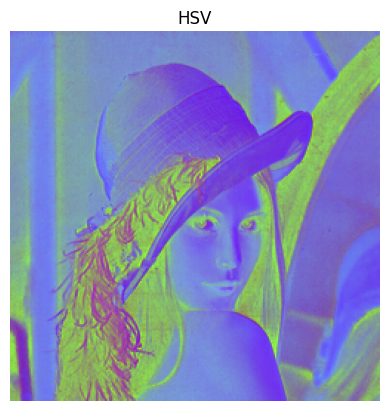

In [45]:
# Convert from BGR to HSV (Hue, Saturation, Value)
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
show_image("HSV", image_hsv)

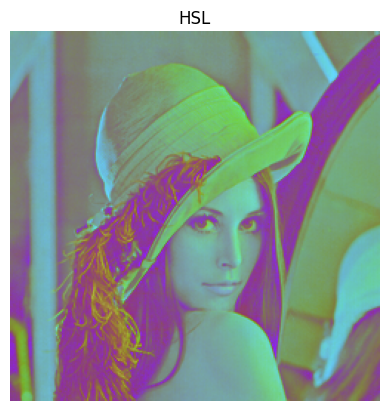

In [46]:
# Convert from BGR to HSL (Hue, Saturation, Lightness)
image_hsl = cv2.cvtColor(image, cv2.COLOR_BGR2HLS)
show_image("HSL", image_hsl)

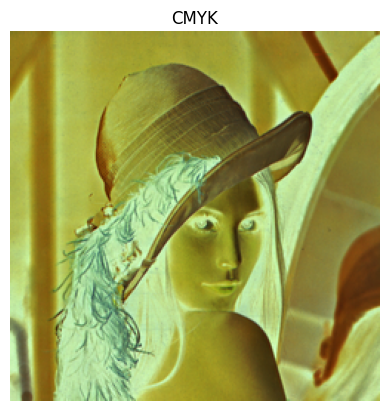

In [47]:
# Convert from BGR to CMYK
# OpenCV doesn't directly support CMYK, so we'll need to convert it manually
image_cmyk = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB first
image_cmyk = 255 - image_cmyk  # In CMYK, we subtract RGB values from 255
show_image("CMYK", image_cmyk)

### 8. (*) Tomar la imagen convertida en escala de grises y volver a convertir al en modo RGB. ¿Qué ha sucedido?


In [48]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

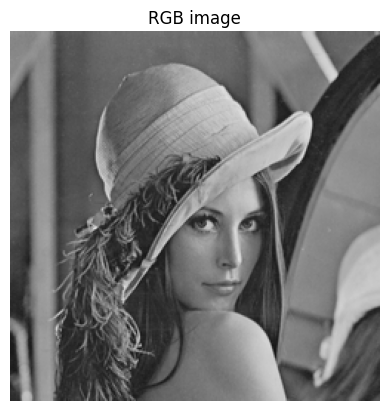

In [49]:
# Convert back to grb
image_color = cv2.cvtColor(gray_image, cv2.COLOR_GRAY2BGR)
show_image("RGB image", image_color)

Cuando se convirtió a escala de grises, se perdió información respectiva a la intensidad de cada color. Cuando volvemos a convertir a RGB, se aplica la misma información  a todos los canales, perdiendo toda diferencia entre intensidad de colores.

### 9. Cargar una imagen en color con OpenCV. Extrae los valores de un píxel en la posición (x, y). Modifica un área de la imagen (por ejemplo, convierte una región a rojo puro). Divide la imagen en sus tres canales de color (B, G, R) y muestra cada uno por separado

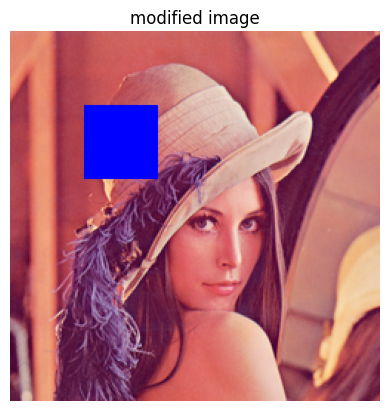

In [50]:
image = read_image("Lenna.png")

# Modify a region of the image to pure red (BGR format for red is [0, 0, 255])
top_left = (50, 50)
size_x = 50
size_y = 50
bottom_right = (top_left[0] + size_x, top_left[1] + size_y)

# Change the region to red by setting all pixel values in the region to pure red
modified_image = image.copy()
modified_image[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0]] = [0, 0, 255]

show_image("modified image", modified_image)

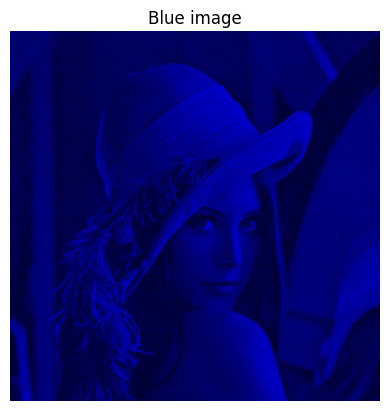

In [58]:
# Blue channel image (only blue channel visible, others set to 0)
image = read_image("Lenna.png")
blue_image = image.copy()
blue_image[:, :, 0] = 0  # Set the Red channel to 0
blue_image[:, :, 1] = 0  # Set the Green channel to 0
show_image("Blue image", blue_image)

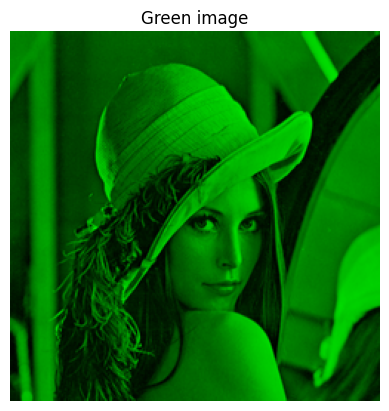

In [52]:
# Green channel image (only green channel visible, others set to 0)
green_image = image.copy()
green_image[:, :, 0] = 0  # Set the Blue channel to 0
green_image[:, :, 2] = 0  # Set the Red channel to 0
show_image("Green image", green_image)

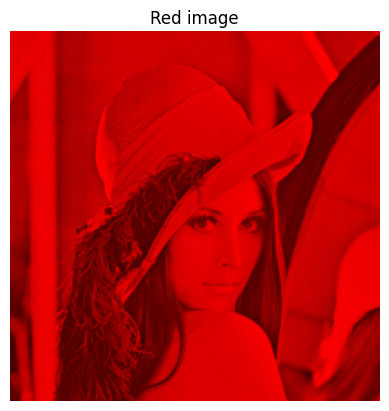

In [59]:
# Red channel image (only red channel visible, others set to 0)
red_image = image.copy()
red_image[:, :, 1] = 0  # Set the Green channel to 0
red_image[:, :, 2] = 0  # Set the Blue channel to 0
show_image("Red image", red_image)

# Sección 2
## 6) (*) Implementar un modelo de compresión basado en codificación Run-Length Encoding (RLE). El algoritmo Run-Length Encoding (RLE) reduce el tamaño de una imagen representando secuencias consecutivas de píxeles idénticos como una sola entrada. Para ello convertir una imagen en escala de grises. luego, implementar el algoritmo RLE para comprimir la imagen. Posteriormente, implementar una función para descomprimir la imagen. Al finalizar, mostrar la imagen original y la imagen reconstruida. Probar con dos o tres imagenes que tengan diferentes características, modos de color. utilizar alguna de las metricas nombradas anteriormente e evaluar el resultado de la misma.

In [54]:
def run_length_enconde(img):
  encoded_img = []

  # First we iterate the image
  for row in range(img.shape[0]):
    encoded_img_row = []
    previous_pixel_value = img[row, 0]
    count = 0
    for col in range(img.shape[1]):
        pixel_value = img[row, col]
        if pixel_value == previous_pixel_value:
            count += 1

        else:
          encoded_img_row.append((previous_pixel_value, count))
          count = 1

        previous_pixel_value = pixel_value
    # This fixes bug of not appending last value
    encoded_img_row.append((previous_pixel_value, count))
    # Appends row
    encoded_img.append(encoded_img_row)
  return encoded_img


In [55]:

def run_length_decode(img):
  decoded_img = []
  for row in range(len(img)):
    decoded_img_row = []
    for pixel_value, count in img[row]:
      for _ in range(count):
        decoded_img_row.append(pixel_value)

    decoded_img.append(decoded_img_row)
  return np.array(decoded_img, dtype=np.uint8)


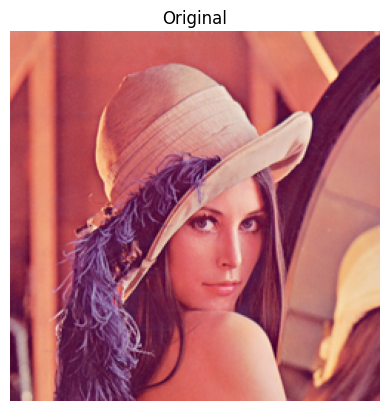

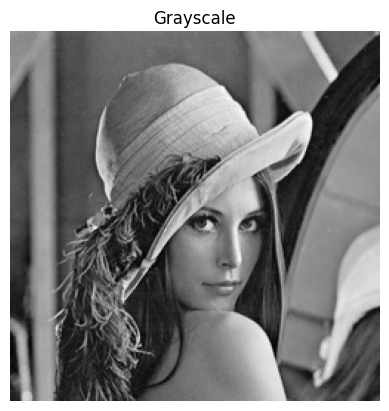

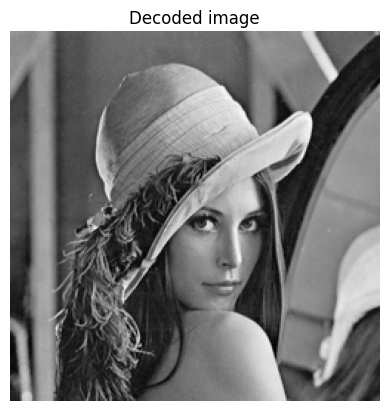

In [56]:
image = read_image( "Lenna.png")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
encoded_image = run_length_enconde(gray_image)
decoded_image = run_length_decode(encoded_image)

show_image("Original", image)
show_image("Grayscale", gray_image)
show_image("Decoded image", decoded_image)